Source: https://www.kaggle.com/roshansharma/market-basket-analysis

# Apriori Algorithm (Replicated from Kaggle)

In [1]:
# libraries
import pandas as pd
import numpy as np

# visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('fivethirtyeight')
import squarify

# showing items in directory
import os
print(os.listdir('./data/'))

# mute warnings
import warnings
warnings.filterwarnings(action = 'ignore')

# for market basket analysis
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

['kaggle-survey-2019', 'Market_Basket_Optimisation.csv', 'seoul_municipalities_geo_simple.json', '상가업소정보_201912_01 (1).csv', '전국 평균 분양가격(2013년 9월부터 2015년 8월까지).csv', '주택도시보증공사_전국 평균 분양가격(2019년 12월).csv']


In [2]:
# import data
data = pd.read_csv('./data/Market_Basket_Optimisation.csv', header = None)
print(data.shape)
data.head()

(7501, 20)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Visualization

Text(0.5, 1.0, 'Most Popular Items')

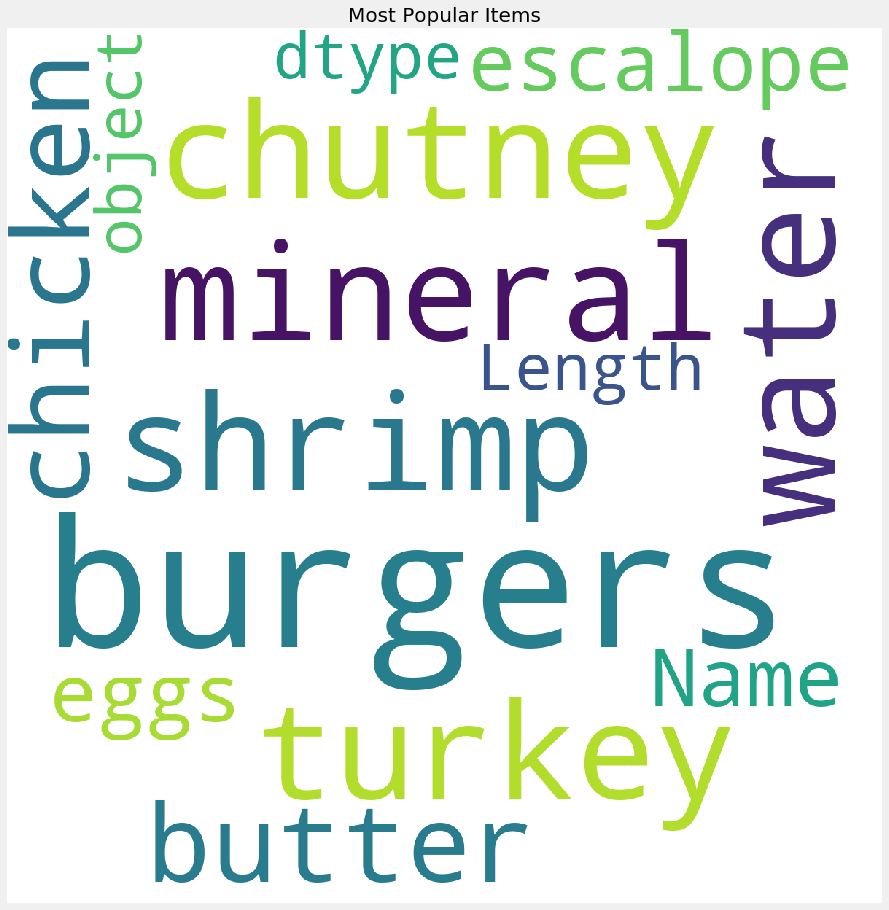

In [3]:
# word cloud
from wordcloud import WordCloud

plt.rcParams['figure.figsize'] = (15, 15)
wordcloud = WordCloud(background_color = 'white',
                     width = 1200, height = 1200, max_words = 121).generate(str(data[0]))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Most Popular Items', fontsize = 20)

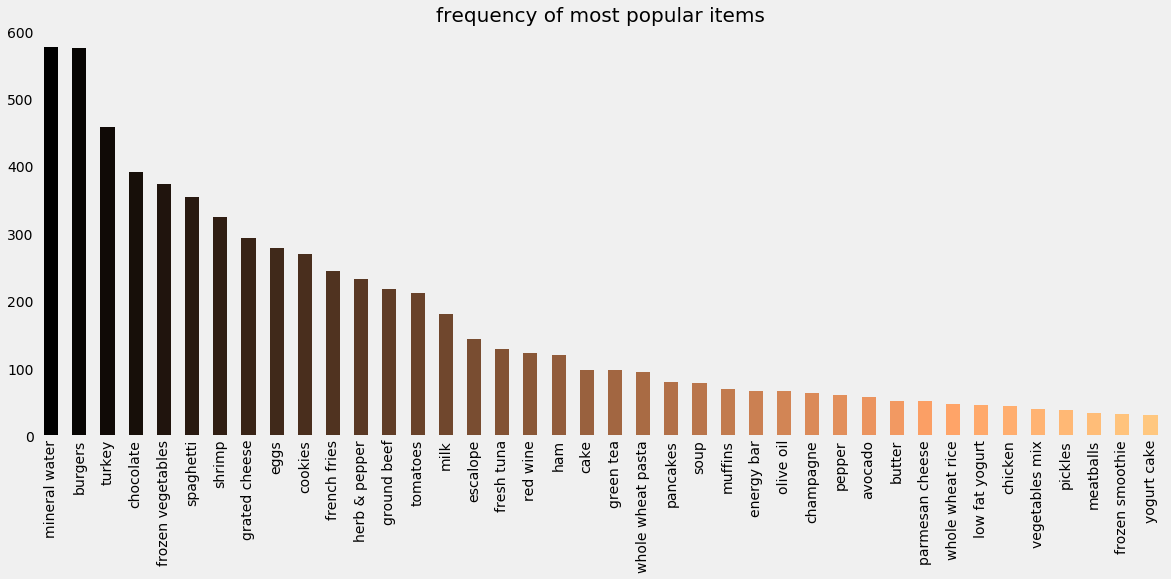

In [4]:
# frequency of most popular items
plt.rcParams['figure.figsize'] = (18, 7)
color = plt.cm.copper(np.linspace(0, 1, 40))
data[0].value_counts().head(40).plot.bar(color = color)
plt.title('frequency of most popular items', fontsize = 20)
plt.xticks(rotation = 90)
plt.grid()


In [5]:
data['food'] = 'Food'
food = data.truncate(before = -1, after = 15)

import networkx as nx

food = nx.from_pandas_edgelist(food, source = 'food', target = 0, edge_attr = True)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Text(0.5, 1.0, 'Top 15 First Choices')

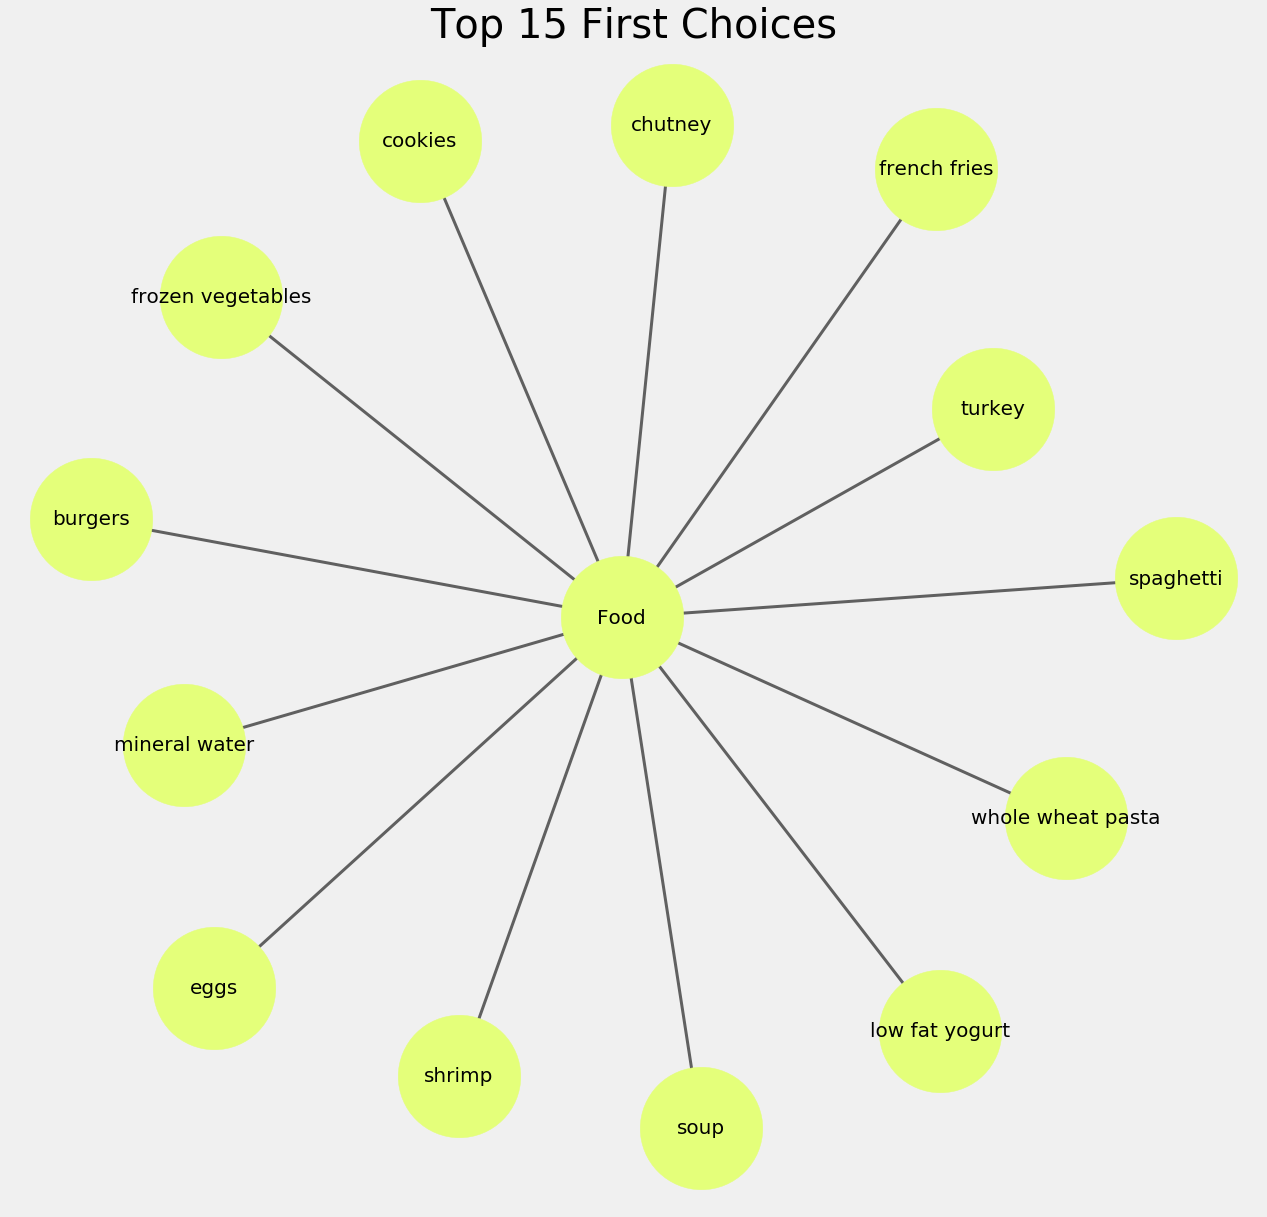

In [7]:
plt.rcParams['figure.figsize'] = (20, 20)
pos = nx.spring_layout(food) # position
color = plt.cm.Wistia(0) # color
# np.linspace(start, end, # of items) - returns an array of evenly spaced numbers, wistia - color code

nx.draw_networkx_nodes(food, pos, node_size = 15000, node_color = color) # circles
nx.draw_networkx_edges(food, pos, width = 3, alpha = 0.6, edge_color = 'black') # lines
nx.draw_networkx_labels(food, pos, font_size = 20, font_family = 'sans-serif') # labels for circles
plt.axis('off') # remove axis lines
plt.grid()
plt.title('Top 15 First Choices', fontsize = 40) # add title


# Data Preprocessing

In [10]:
# putting shopping list of each customer to a list
trans = []
for i in range(0, len(data)):
    trans.append([str(data.values[i, j]) for j in range(0, 20)])

# convert the list into an array
trans = np.array(trans)

trans.shape

(7501, 20)

In [13]:
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
data = te.fit_transform(trans)
# TransactionEncoder reads all unique items in list of lists and create an array with each row as a representation of
# containing a specific item or not (similar to dummy variables)
data = pd.DataFrame(data, columns = te.columns_)

data.head()

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,True,True,False,True,False,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [15]:
# reduce number of items
data = data.loc[:, ['mineral water', 'burgers', 'turkey', 'chocolate', 'frozen vegetables', 'spaghetti',
                    'shrimp', 'grated cheese', 'eggs', 'cookies', 'french fries', 'herb & pepper', 'ground beef',
                    'tomatoes', 'milk', 'escalope', 'fresh tuna', 'red wine', 'ham', 'cake', 'green tea',
                    'whole wheat pasta', 'pancakes', 'soup', 'muffins', 'energy bar', 'olive oil', 'champagne', 
                    'avocado', 'pepper', 'butter', 'parmesan cheese', 'whole wheat rice', 'low fat yogurt', 
                    'chicken', 'vegetables mix', 'pickles', 'meatballs', 'frozen smoothie', 'yogurt cake']]
data.shape

(7501, 40)

# Apriori 
Kaggle: a key concept in apriori algorithm is the anti-monotonicity of the support measure. It assumes that:
 * all subsets of a frequent itemset must be frequent
 * similarly, for any infrequent itemset, all its supersets must be infrequent too
 
1. frequency table for all items in table
2. find all items that pass the threshold
3. make all possible pairs of significant items
4. count occurances of each pair in all transactions
5. find all pairs that pass the threshold

In [19]:
apriori(data, min_support = 0.01, use_colnames = True)

,support,itemsets
0,0.238368,(mineral water)
1,0.087188,(burgers)
2,0.062525,(turkey)
3,0.163845,(chocolate)
4,0.095321,(frozen vegetables)
...,...,...
204,0.010132,"(mineral water, ground beef, eggs)"
205,0.013065,"(mineral water, eggs, milk)"
206,0.011065,"(mineral water, ground beef, milk)"
207,0.010532,"(chocolate, spaghetti, eggs)"


In [21]:
# assign threshold at support of 5% (0.05)
frequent_itemsets = apriori(data, min_support = 0.05, use_colnames = True)

# assign # of items in each itemset
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length
0,0.238368,(mineral water),1
1,0.087188,(burgers),1
2,0.062525,(turkey),1
3,0.163845,(chocolate),1
4,0.095321,(frozen vegetables),1
5,0.174110,(spaghetti),1
6,0.071457,(shrimp),1
7,0.052393,(grated cheese),1
8,0.179709,(eggs),1
9,0.080389,(cookies),1


In [23]:
# itemsets with one item and support greater than 10%
frequent_itemsets[ (frequent_itemsets['length'] == 1) & (frequent_itemsets['support'] > 0.1)]

,support,itemsets,length
0,0.238368,(mineral water),1
3,0.163845,(chocolate),1
5,0.174110,(spaghetti),1
8,0.179709,(eggs),1
10,0.170911,(french fries),1
13,0.129583,(milk),1
16,0.132116,(green tea),1


In [26]:
# itemsets with two items
frequent_itemsets[frequent_itemsets['length'] == 2]

,support,itemsets,length
24,0.052660,"(chocolate, mineral water)",2
25,0.059725,"(mineral water, spaghetti)",2
26,0.050927,"(mineral water, eggs)",2
